In [36]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [38]:
# Load the dataset
data = pd.read_csv(r"D:\DS-B3\Fundamental of DS\E-comer_customer_behave\Finaldata_Adjusted_Income_Product_Ratio_Dataset.csv")

data = data.drop(columns=['Customer Name'])

data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d/%m/%Y %H:%M')

# Calculate Average Purchase Value
# Group by 'Customer ID' to calculate metrics
customer_metrics = data.groupby('Customer ID').agg(
  total_revenue=('Total purchase amount', 'sum'),
  total_purchases=('Total purchase amount', 'count'),
  churn=('Churn', 'mean')
).reset_index()

# Calculate CLV
customer_metrics['CLV'] = customer_metrics['total_revenue'] * (1 - customer_metrics['churn'])

# Merge CLV back to the original dataset
data = data.merge(customer_metrics[['Customer ID', 'CLV']], on='Customer ID', how='left')

# Display the dataset with Customer Lifetime and CLV
print(data[['Customer ID', 'CLV']])

# Display basic information and first few rows of the dataset to assess its structure
data_info = data.info()
data_head = data.head()

data_info, data_head

#data.to_csv(r'C:\Cheynhen\Python\Dataset\e-commerce\ecom_with_clv.csv', index=False)

        Customer ID      CLV
0             46251  1728.60
1             46251  1728.60
2             46251  1728.60
3             46251  1728.60
4             13593  1651.20
...             ...      ...
249995        33308   407.34
249996        48835    18.63
249997        21019    51.00
249998        49234   461.68
249999        16971  1079.50

[250000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total purchase amount  250000 non-null  int64         
 6   Payment Method         250000

(None,
    Customer ID       Purchase Date Product Category  Product Price  Quantity  \
 0        46251 2023-04-05 20:12:00      Electronics             12         3   
 1        46251 2022-01-09 06:22:00             Home            468         4   
 2        46251 2022-04-20 13:03:00             Home            288         2   
 3        46251 2023-07-05 01:57:00         Clothing            196         1   
 4        13593 2021-11-14 21:43:00             Home            449         1   
 
    Total purchase amount Payment Method  Customer Age  Returns  Age  Gender  \
 0                     36         Crypto            37        0   37    Male   
 1                   1872    Credit Card            37        0   37    Male   
 2                    576    Credit Card            37        0   37    Male   
 3                    196         Crypto            37        0   37    Male   
 4                    449    Credit Card            49        1   49  Female   
 
    Churn  Product/Inco

In [39]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total purchase amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Product/Income Ratio,Discount Apply,CLV
0,46251,2023-04-05 20:12:00,Electronics,12,3,36,Crypto,37,0,37,Male,0.355,0.05,11,1728.6
1,46251,2022-01-09 06:22:00,Home,468,4,1872,Credit Card,37,0,37,Male,0.355,1.96,7,1728.6
2,46251,2022-04-20 13:03:00,Home,288,2,576,Credit Card,37,0,37,Male,0.355,1.25,0,1728.6
3,46251,2023-07-05 01:57:00,Clothing,196,1,196,Crypto,37,0,37,Male,0.355,0.77,11,1728.6
4,13593,2021-11-14 21:43:00,Home,449,1,449,Credit Card,49,1,49,Female,0.355,1.98,11,1651.2


In [40]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total purchase amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Product/Income Ratio,Discount Apply,CLV
0,46251,2023-04-05 20:12:00,Electronics,12,3,36,Crypto,37,0,37,Male,0.355,0.05,11,1728.6
1,46251,2022-01-09 06:22:00,Home,468,4,1872,Credit Card,37,0,37,Male,0.355,1.96,7,1728.6
2,46251,2022-04-20 13:03:00,Home,288,2,576,Credit Card,37,0,37,Male,0.355,1.25,0,1728.6
3,46251,2023-07-05 01:57:00,Clothing,196,1,196,Crypto,37,0,37,Male,0.355,0.77,11,1728.6
4,13593,2021-11-14 21:43:00,Home,449,1,449,Credit Card,49,1,49,Female,0.355,1.98,11,1651.2


In [41]:
# Group by Customer ID to aggregate the total purchase amount per customer
customer_clv = data.groupby('Customer ID').agg({
   'Total purchase amount': 'sum',
   'Quantity': 'count',  # Number of transactions
   'Churn': 'mean'       # Average churn score (if provided per transaction)
}).rename(columns={'Total purchase amount': 'Total CLV', 'Quantity': 'Purchase Frequency'})

# Adjust CLV based on churn probability (optional)
customer_clv['Adjusted CLV'] = customer_clv['Total CLV'] * (1 - customer_clv['Churn'])

# Display a few rows of the result to understand the output
customer_clv.head()

,Total CLV,Purchase Frequency,Churn,Adjusted CLV
Customer ID,,,,
1,845,1,0.255,629.525
2,1070,3,0.385,658.050
3,5041,8,0.455,2747.345
4,1433,4,0.285,1024.595
5,7881,8,0.405,4689.195


In [42]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer ID,250000.0,25004.03624,1.0,12497.75,25018.0,37506.0,50000.0,14428.27959
Purchase Date,250000,2022-09-26 19:50:27.205440,2021-01-01 00:03:00,2022-02-18 06:01:30,2022-11-18 22:43:00,2023-06-09 11:03:00,2023-11-27 22:57:00,NaN
Product Price,250000.0,254.659512,10.0,132.0,255.0,377.0,500.0,141.568577
Quantity,250000.0,2.998896,1.0,2.0,3.0,4.0,5.0,1.414694
Total purchase amount,250000.0,763.635756,10.0,290.0,603.0,1134.0,2500.0,591.621735
Customer Age,250000.0,43.940528,18.0,31.0,44.0,57.0,70.0,15.350246
Returns,250000.0,0.143676,0.0,0.0,0.0,0.0,1.0,0.350762
Age,250000.0,43.940528,18.0,31.0,44.0,57.0,70.0,15.350246
Churn,250000.0,0.361059,0.25,0.305,0.355,0.41,0.5,0.06863
Product/Income Ratio,250000.0,0.901843,0.01,0.33,0.75,1.38,2.75,0.66338


CLV (Customer Lifetime Value) = Average Purchase Value x Purchase Frequency x Customer Lifetime

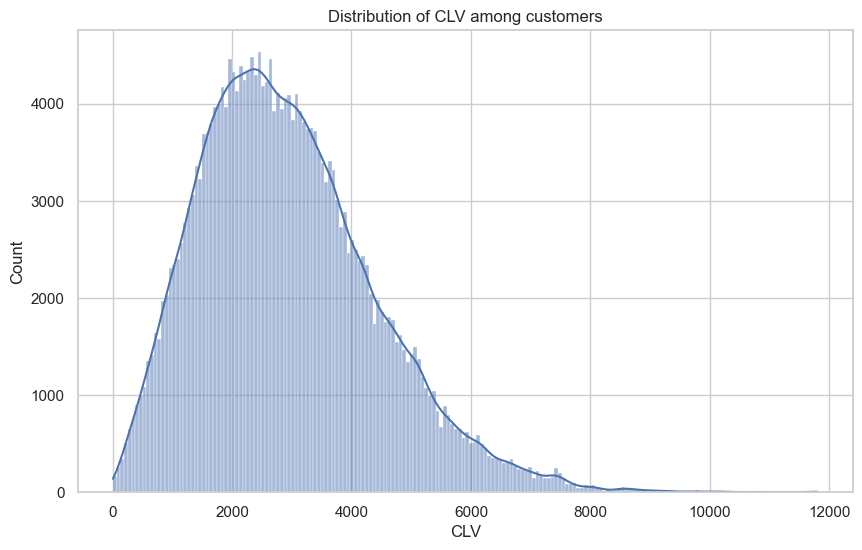

In [43]:
plt.figure(figsize = (10, 6))
sns.histplot(data = data, x = 'CLV', kde = True)
plt.title('Distribution of CLV among customers')
plt.show()

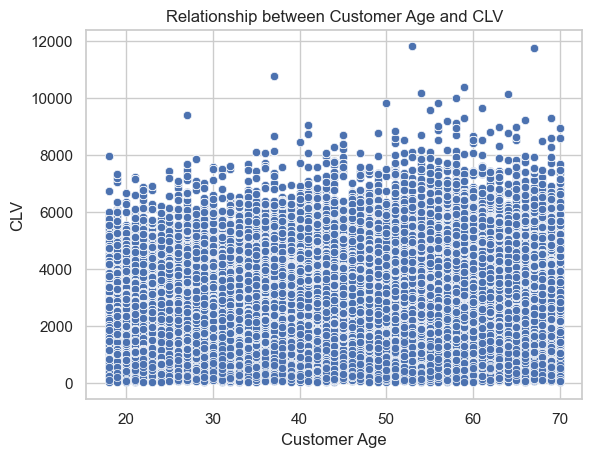

In [44]:
sns.scatterplot(data = data, x = 'Customer Age', y = 'CLV')
plt.title('Relationship between Customer Age and CLV')
plt.show()

In [45]:
bins = [18, 24, 34, 44, 54, 64, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '> 65']
data['Age Group'] = pd.cut(data['Customer Age'], bins = bins, labels = labels)
data.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total purchase amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Product/Income Ratio,Discount Apply,CLV,Age Group
0,46251,2023-04-05 20:12:00,Electronics,12,3,36,Crypto,37,0,37,Male,0.355,0.05,11,1728.6,35-44
1,46251,2022-01-09 06:22:00,Home,468,4,1872,Credit Card,37,0,37,Male,0.355,1.96,7,1728.6,35-44
2,46251,2022-04-20 13:03:00,Home,288,2,576,Credit Card,37,0,37,Male,0.355,1.25,0,1728.6,35-44
3,46251,2023-07-05 01:57:00,Clothing,196,1,196,Crypto,37,0,37,Male,0.355,0.77,11,1728.6,35-44
4,13593,2021-11-14 21:43:00,Home,449,1,449,Credit Card,49,1,49,Female,0.355,1.98,11,1651.2,45-54
5,13593,2023-10-10 02:57:00,Home,250,4,1000,Credit Card,49,0,49,Female,0.355,0.99,5,1651.2,45-54
6,13593,2023-07-11 18:04:00,Electronics,73,1,73,Credit Card,49,0,49,Female,0.355,0.32,22,1651.2,45-54
7,13593,2021-02-16 08:43:00,Books,337,2,674,Cash,49,1,49,Female,0.355,1.37,19,1651.2,45-54
8,13593,2023-11-14 19:12:00,Clothing,182,2,364,Cash,49,0,49,Female,0.355,0.80,26,1651.2,45-54
9,28805,2021-10-18 05:43:00,Electronics,394,2,788,Paypal,19,1,19,Male,0.400,0.42,0,1513.2,18-24


In [46]:
data['Age Group'].value_counts()

Age Group
55-64    47218
35-44    47067
25-34    47064
45-54    46700
18-24    28668
> 65     28280
Name: count, dtype: int64

In [47]:
# Group by Age Group and Payment Method and calculate average CLV
segment_data = data.groupby(['Age Group', 'Payment Method']).agg({'CLV': 'mean'}).reset_index().rename(columns={'CLV': 'Average CLV'})

C:\Users\Admin\AppData\Local\Temp\ipykernel_265448\1115352514.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_data = data.groupby(['Age Group', 'Payment Method']).agg({'CLV': 'mean'}).reset_index().rename(columns={'CLV': 'Average CLV'})


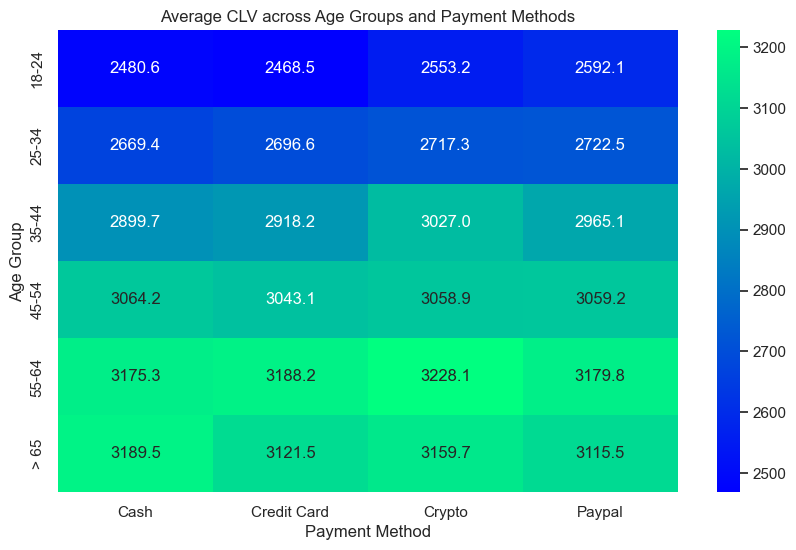

In [48]:
# Pivot data for heatmap
pivot_data = segment_data.pivot(index='Age Group', columns='Payment Method', values='Average CLV')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="winter")
plt.title("Average CLV across Age Groups and Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Age Group")
plt.show()

In [49]:
# Define thresholds for high and low CLV (customize based on your data)
high_clv_threshold = data['CLV'].quantile(0.75)  # Top 25% as high CLV
low_clv_threshold = data['CLV'].quantile(0.25)   # Bottom 25% as low CLV

# Label segments as 'High CLV' or 'Low CLV'
#segment_data['CLV Segment'] = np.where(segment_data['Average CLV'] >= high_clv_threshold, 'High CLV',
#                                       np.where(segment_data['Average CLV'] <= low_clv_threshold, 'Low CLV', 'Mid CLV'))

# Define threshold-based CLV segments based on identified thresholds
def assign_clv_segment(clv_value):
   if clv_value < low_clv_threshold:
      return 'Low CLV'
   elif clv_value > high_clv_threshold:
      return 'High CLV'
   else:
      return 'Medium CLV'
segment_data['CLV Segment'] = data['CLV'].apply(assign_clv_segment)
data['CLV Segment'] = data['CLV'].apply(assign_clv_segment)

# Display updated segment_data with CLV segments
print(segment_data)

   Age Group Payment Method  Average CLV CLV Segment
0      18-24           Cash  2480.644690     Low CLV
1      18-24    Credit Card  2468.541350     Low CLV
2      18-24         Crypto  2553.224505     Low CLV
3      18-24         Paypal  2592.101003     Low CLV
4      25-34           Cash  2669.408564     Low CLV
5      25-34    Credit Card  2696.600360     Low CLV
6      25-34         Crypto  2717.259617     Low CLV
7      25-34         Paypal  2722.487155     Low CLV
8      35-44           Cash  2899.746702     Low CLV
9      35-44    Credit Card  2918.162366     Low CLV
10     35-44         Crypto  3027.031900     Low CLV
11     35-44         Paypal  2965.116861     Low CLV
12     45-54           Cash  3064.163219     Low CLV
13     45-54    Credit Card  3043.080681     Low CLV
14     45-54         Crypto  3058.937899     Low CLV
15     45-54         Paypal  3059.178195  Medium CLV
16     55-64           Cash  3175.337508  Medium CLV
17     55-64    Credit Card  3188.219898  Medi

In [50]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total purchase amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Product/Income Ratio,Discount Apply,CLV,Age Group,CLV Segment
0,46251,2023-04-05 20:12:00,Electronics,12,3,36,Crypto,37,0,37,Male,0.355,0.05,11,1728.6,35-44,Low CLV
1,46251,2022-01-09 06:22:00,Home,468,4,1872,Credit Card,37,0,37,Male,0.355,1.96,7,1728.6,35-44,Low CLV
2,46251,2022-04-20 13:03:00,Home,288,2,576,Credit Card,37,0,37,Male,0.355,1.25,0,1728.6,35-44,Low CLV
3,46251,2023-07-05 01:57:00,Clothing,196,1,196,Crypto,37,0,37,Male,0.355,0.77,11,1728.6,35-44,Low CLV
4,13593,2021-11-14 21:43:00,Home,449,1,449,Credit Card,49,1,49,Female,0.355,1.98,11,1651.2,45-54,Low CLV


In [ ]:
# Implementing customer segmentation based on specific criteria in Python
# Filtering high-value customers for personalized retention programs

# Select high-value customers based on CLV segment
high_value_customers = data[data['CLV Segment'] == 'High CLV']

# Define criteria for each retention program suggestion

# 1. Exclusive Loyalty Program: High-value customers with low Product/Income Ratio and low Discount Apply
exclusive_loyalty_program = high_value_customers[(high_value_customers['Product/Income Ratio'] < 0.5) &
                                                (high_value_customers['Discount Apply'] < 5)]

# 2. Priority Support: High purchase amount with low returns
priority_support_customers = high_value_customers[(high_value_customers['Total purchase amount'] > 1000) &
                                                (high_value_customers['Returns'] == 0)]

# 3. Personalized Rewards: Frequent discount users with high total purchase
personalized_rewards_customers = high_value_customers[(high_value_customers['Discount Apply'] > 5) &
                                                      (high_value_customers['Total purchase amount'] > 1000)]

# 4. Birthday Offers: Segmenting high-value customers by age group for targeted birthday offers
young_customers = high_value_customers[high_value_customers['Customer Age'] < 30]
middle_aged_customers = high_value_customers[(high_value_customers['Customer Age'] >= 30) & 
                                             (high_value_customers['Customer Age'] < 55)]
senior_customers = high_value_customers[high_value_customers['Customer Age'] >= 55]

# 5. Gamified Milestones: Frequent high-value shoppers based on Customer ID counts
frequent_shoppers = high_value_customers.groupby('Customer ID').filter(lambda x: len(x) > 3)

# 6. Enhanced Referral Rewards: High product/income ratio customers
high_income_ratio_customers = high_value_customers[high_value_customers['Product/Income Ratio'] > 1.0]

# Summarize the number of customers in each program suggestion
program_summary = {
   "Exclusive Loyalty Program": len(exclusive_loyalty_program),
   "Priority Support": len(priority_support_customers),
   "Personalized Rewards": len(personalized_rewards_customers),
   "Birthday Offers - Young": len(young_customers),
   "Birthday Offers - Middle-aged": len(middle_aged_customers),
   "Birthday Offers - Senior": len(senior_customers),
   "Frequent Shoppers": len(frequent_shoppers),
   "Enhanced Referral Rewards": len(high_income_ratio_customers)
}

program_summary


{'Exclusive Loyalty Program': 3529,
 'Priority Support': 22456,
 'Personalized Rewards': 15590,
 'Birthday Offers - Young': 9380,
 'Birthday Offers - Middle-aged': 29867,
 'Birthday Offers - Senior': 23248,
 'Gamified Milestones': 62453,
 'Enhanced Referral Rewards': 32330}

In [64]:
retention_clv_distribution = {
   "Exclusive Loyalty Program": exclusive_loyalty_program['CLV'].describe(),
   "Priority Support": priority_support_customers['CLV'].describe(),
   "Personalized Rewards": personalized_rewards_customers['CLV'].describe(),
   "Birthday Offers - Young": young_customers['CLV'].describe(),
   "Birthday Offers - Middle-aged": middle_aged_customers['CLV'].describe(),
   "Birthday Offers - Senior": senior_customers['CLV'].describe(),
   "Frequent Shoppers": frequent_shoppers['CLV'].describe(),
   "Enhanced Referral Rewards": high_income_ratio_customers['CLV'].describe()
}

retention_clv_df = pd.DataFrame(retention_clv_distribution).T

In [53]:
# Implementing targeted promotions for lower-value segments based on specific criteria in Python

# Select low-value customers based on CLV segment
low_value_customers = data[data['CLV Segment'] == 'Low CLV']

# Define criteria for each promotion suggestion

# 1. Discount-Driven Campaigns: Customers with high Product/Income Ratio
discount_campaign_customers = low_value_customers[low_value_customers['Product/Income Ratio'] > 1.0]

# 2. Bundled Offers: Frequent small purchases, identified by lower Total Purchase Amount
bundle_offer_customers = low_value_customers[low_value_customers['Total purchase amount'] < 200]

# 3. Support young customers
support_young_customers = low_value_customers[low_value_customers['Age Group'] == '18-24']

# 4. Limited-Time Free Shipping: Customers with smaller quantity purchases
free_shipping_customers = low_value_customers[low_value_customers['Quantity'] < 2]

# 5. First-Time Offer on High-Value Products: Customers with low average Product Price
first_time_offer_customers = low_value_customers[low_value_customers['Product Price'] < 50]

# 6. Upsell and Cross-Sell: Low CLV customers with specific Product Category purchases
upsell_customers = low_value_customers[low_value_customers['Product Category'] == low_value_customers['Product Category'].mode()[0]]

# 7. Engagement Challenges: Customers with infrequent purchases (assuming irregular purchases)
engagement_challenge_customers = low_value_customers.groupby('Customer ID').filter(lambda x: len(x) < 2)

# Summarize the number of customers in each promotion suggestion
promotion_summary = {
   "Discount Campaign" : len(discount_campaign_customers),
   "Bundle Offers" : len(bundle_offer_customers),
   'Young customer support' : len(support_young_customers),
   "Free Shipping" : len(free_shipping_customers),
   "First-Time Offer on High-Value" : len(first_time_offer_customers),
   "Upsell and Cross-Sell" : len(upsell_customers),
   "Engagement Challenge" : len(engagement_challenge_customers)
}

promotion_summary


{'Discount Campaign': 16468,
 'Bundle Offers': 15233,
 'Young customer support': 9375,
 'Free Shipping': 16583,
 'First-Time Offer on High-Value': 7552,
 'Upsell and Cross-Sell': 18807,
 'Engagement Challenge': 1685}

C:\Users\Admin\AppData\Local\Temp\ipykernel_265448\2350090178.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clv_segment_counts.index, y=clv_segment_counts.values, palette="Blues_d")


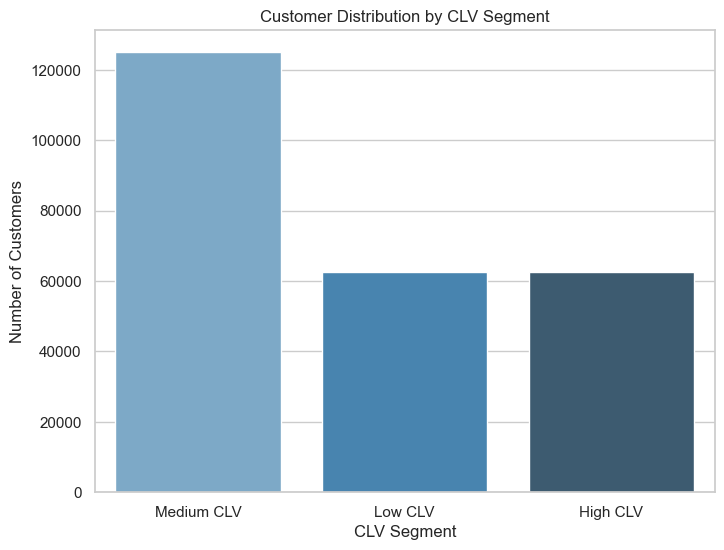

C:\Users\Admin\AppData\Local\Temp\ipykernel_265448\2350090178.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLV Segment', y='CLV', data=data, palette="Blues")


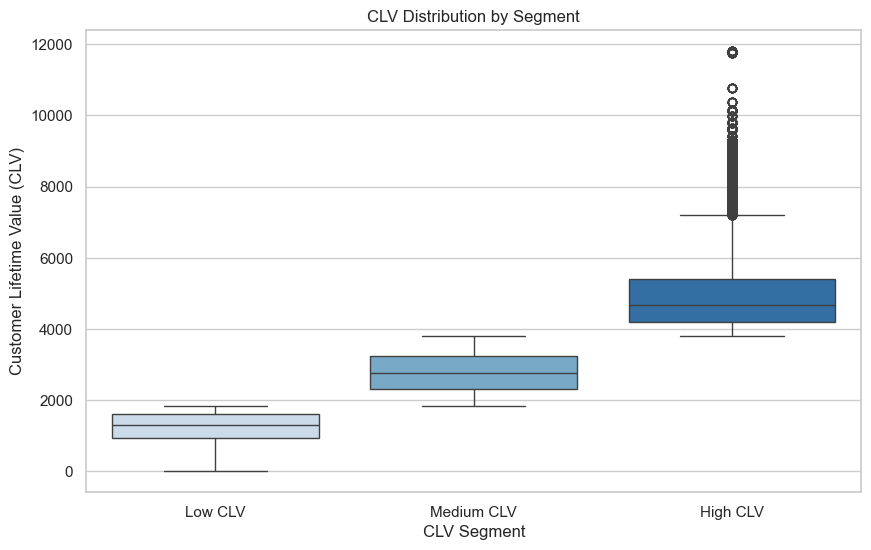

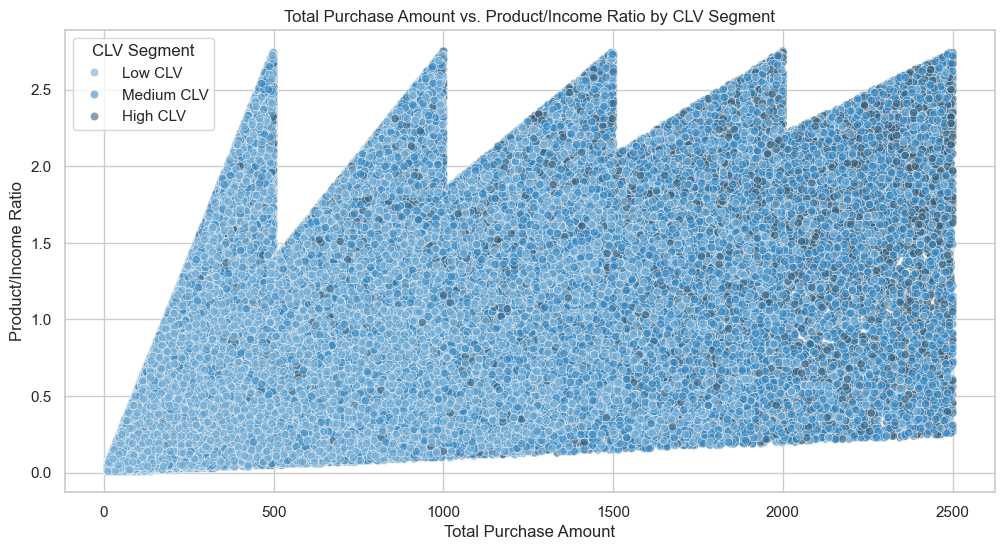

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn uses matplotlib's style
sns.set_theme(style="whitegrid")

# Plotting the distribution of customers in each CLV segment
clv_segment_counts = data['CLV Segment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=clv_segment_counts.index, y=clv_segment_counts.values, palette="Blues_d")
plt.title("Customer Distribution by CLV Segment")
plt.xlabel("CLV Segment")
plt.ylabel("Number of Customers")
plt.show()

# Plotting the CLV distribution across segments for further insight
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLV Segment', y='CLV', data=data, palette="Blues")
plt.title("CLV Distribution by Segment")
plt.xlabel("CLV Segment")
plt.ylabel("Customer Lifetime Value (CLV)")
plt.show()

# Plotting Total Purchase Amount and Product/Income Ratio by CLV Segment
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total purchase amount', y='Product/Income Ratio', hue='CLV Segment', data=data, palette="Blues_d", alpha=0.6)
plt.title("Total Purchase Amount vs. Product/Income Ratio by CLV Segment")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Product/Income Ratio")
plt.legend(title="CLV Segment")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_265448\1807016203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Count', y='Program', data=program_df, palette="Blues_d")


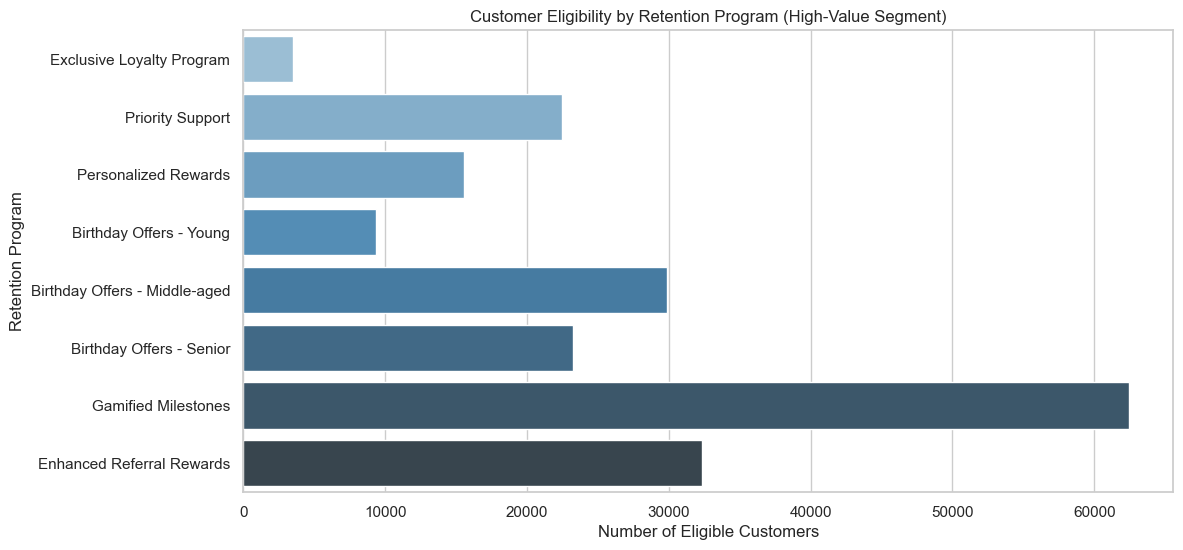

C:\Users\Admin\AppData\Local\Temp\ipykernel_265448\1807016203.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLV', y='Program', data=program_clv_df, palette="Blues")


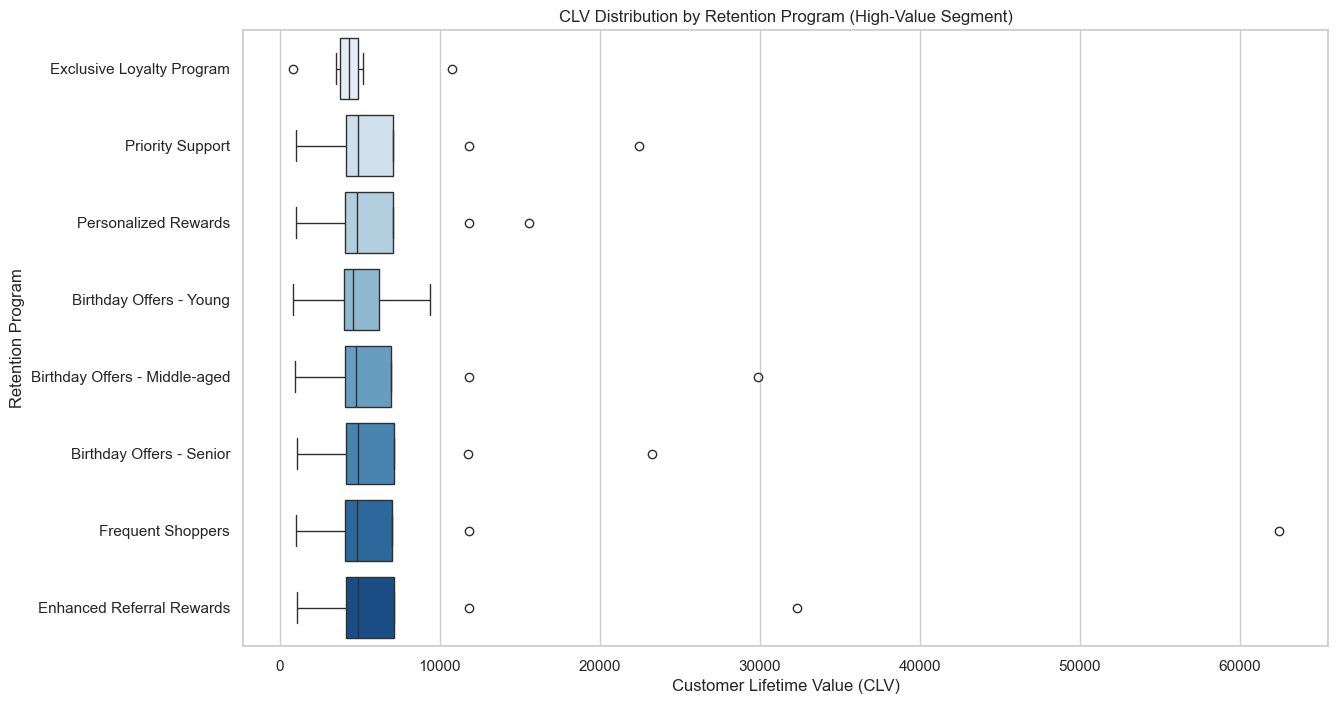

In [65]:
# Convert to DataFrame for easy plotting
program_df = pd.DataFrame(list(program_summary.items()), columns=['Program', 'Customer Count'])

# Bar plot of customer eligibility by retention program
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Count', y='Program', data=program_df, palette="Blues_d")
plt.title("Customer Eligibility by Retention Program (High-Value Segment)")
plt.xlabel("Number of Eligible Customers")
plt.ylabel("Retention Program")
plt.show()

# Converting to a DataFrame for plotting
program_clv_df = pd.DataFrame({
   "CLV": np.concatenate(list(retention_clv_distribution.values())),
   "Program": np.repeat(list(retention_clv_distribution.keys()), [len(v) for v in retention_clv_distribution.values()])
})

# Box plot showing the CLV distribution by retention program
plt.figure(figsize=(14, 8))
sns.boxplot(x='CLV', y='Program', data=program_clv_df, palette="Blues")
plt.title("CLV Distribution by Retention Program (High-Value Segment)")
plt.xlabel("Customer Lifetime Value (CLV)")
plt.ylabel("Retention Program")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_265448\2517448766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Count', y='Promotion', data=promotion_df, palette="Greens_d")


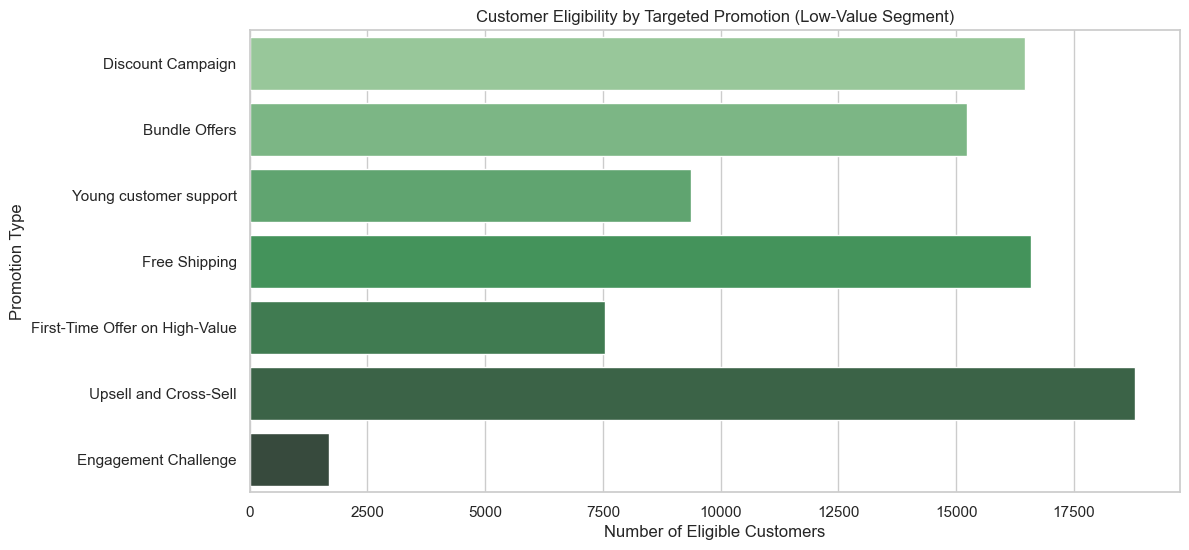

In [62]:
# Convert to DataFrame for plotting
promotion_df = pd.DataFrame(list(promotion_summary.items()), columns=['Promotion', 'Customer Count'])

# 1. Bar Plot: Customer Eligibility by Promotion Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Count', y='Promotion', data=promotion_df, palette="Greens_d")
plt.title("Customer Eligibility by Targeted Promotion (Low-Value Segment)")
plt.xlabel("Number of Eligible Customers")
plt.ylabel("Promotion Type")
plt.show()